In [106]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



# load dataset


In [55]:
df = pd.read_csv('/Users/sham_sara/Desktop/demand forecasting/processed-data/cleaned_data.csv', encoding='unicode_escape')
df.drop(columns=['Date'], inplace=True)


# encoding

In [57]:
df["Holiday"] = df["Holiday"].map({"No Holiday" : 0, "Holiday": 1})
df["Functioning Day"] = df["Functioning Day"].map({"No" : 0, "Yes": 1})


In [58]:
df_season = pd.get_dummies(df["Seasons"],drop_first = True).astype(int)
df_weekday = pd.get_dummies(df["weekday"],drop_first = True).astype(int)

In [60]:
df = pd.concat([df, df_season, df_weekday], axis = 1)


,Rented Bike Count,Hour,Temperature(Â°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,...,weekday,Spring,Summer,Winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,...,Friday,0,0,1,0,0,0,0,0,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,...,Friday,0,0,1,0,0,0,0,0,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,...,Friday,0,0,1,0,0,0,0,0,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,...,Friday,0,0,1,0,0,0,0,0,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,...,Friday,0,0,1,0,0,0,0,0,0


In [63]:
df.drop(["Seasons", "weekday"], axis = 1, inplace = True)


# Test and train split

In [79]:
x = df.drop("Rented Bike Count", axis = 1)
y = df["Rented Bike Count"]
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state = 2023)


# feature scaling 

In [80]:
sc = StandardScaler()
sc.fit(x_train)

x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

# Training models

### linear regression 

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [84]:
y_pred = lr.predict(x_test)

In [85]:
y_pred

array([  -3.42150244, 1022.33291293, 1474.26387368, ..., 1524.82148315,
        547.90926416,  739.64325466])

# linear regression model evaluation

In [129]:
def get_metrics(y_true, y_pred, model):

    # Calculate MSE
    mse = mean_squared_error(y_true, y_pred)
    
    # Calculate MAE
    mae = mean_absolute_error(y_true, y_pred)
    
    # Calculate RMSE Score
    rmse = np.sqrt(mse)
    
    # Calculate R² Score
    r2 = r2_score(y_true, y_pred)
    
    print(f"(MSE): {round(mse, 3)}, (MAE): {round(mae, 3)}, (RMSE): {round(rmse, 3)}, R² Score: {round(r2, 3)}")



In [96]:
get_metrics(y_test, y_pred, "lr")

(MSE): 186569.982, (MAE): 330.211, (RMSE): 431.937, R² Score: 0.543


# training multiple models

In [108]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [113]:
# ridge regressor
rir = Ridge().fit(x_train, y_train)
y_pred_rir = rir.predict(x_test)

# lasso regressor
lar = Lasso().fit(x_train, y_train)
y_pred_lar = lar.predict(x_test)


# poly regressor
# Polynomial Regression (with Degree 2 as an example)
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)
poly_r = LinearRegression().fit(x_train_poly, y_train)
y_pred_poly = poly_r.predict(x_test_poly)


#sv regressor
svr = SVR().fit(x_train, y_train)
y_pred_svr = svr.predict(x_test)

# K-Nearest Neighbors Regressor (KNN)
knn = KNeighborsRegressor().fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

# Decision Tree Regressor
tree = DecisionTreeRegressor().fit(x_train, y_train)
y_pred_tree = tree.predict(x_test)

# Random Forest Regressor
rf = RandomForestRegressor().fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

# XGBoost Regressor
xgb = XGBRegressor().fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)


In [147]:
get_metrics(y_test, y_pred_rir, "rir")
get_metrics(y_test, y_pred_lar, "lar")
get_metrics(y_test, y_pred_poly, "poly_r")
get_metrics(y_test, y_pred_svr, "svr")
get_metrics(y_test, y_pred_knn, "knn")
get_metrics(y_test, y_pred_tree, "tree")
get_metrics(y_test, y_pred_rf, "rf")
get_metrics(y_test, y_pred_xgb, "xgb")

(MSE): 186567.569, (MAE): 330.2, (RMSE): 431.935, R² Score: 0.543
(MSE): 187028.139, (MAE): 330.257, (RMSE): 432.468, R² Score: 0.542
(MSE): 117547.203, (MAE): 240.16, (RMSE): 342.852, R² Score: 0.712
(MSE): 313071.334, (MAE): 381.349, (RMSE): 559.528, R² Score: 0.233
(MSE): 100530.621, (MAE): 207.508, (RMSE): 317.066, R² Score: 0.754
(MSE): 59212.449, (MAE): 133.789, (RMSE): 243.336, R² Score: 0.855
(MSE): 29387.62, (MAE): 97.937, (RMSE): 171.428, R² Score: 0.928
(MSE): 24164.912, (MAE): 95.454, (RMSE): 155.451, R² Score: 0.941


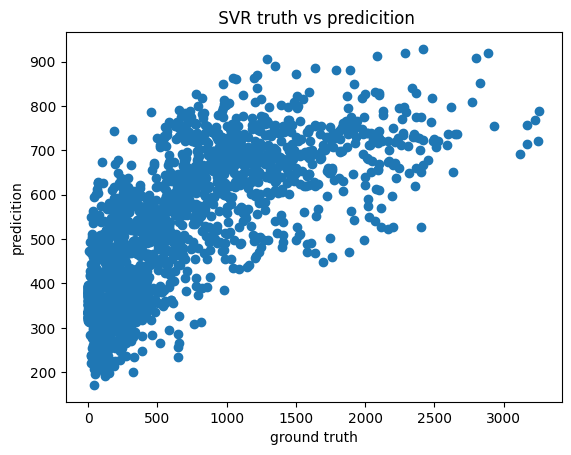

In [155]:
plt.scatter(y_test, y_pred_svr)
plt.title(" SVR truth vs predicition")
plt.xlabel("ground truth")
plt.ylabel("predicition")
plt.show()

# visual model prediction 

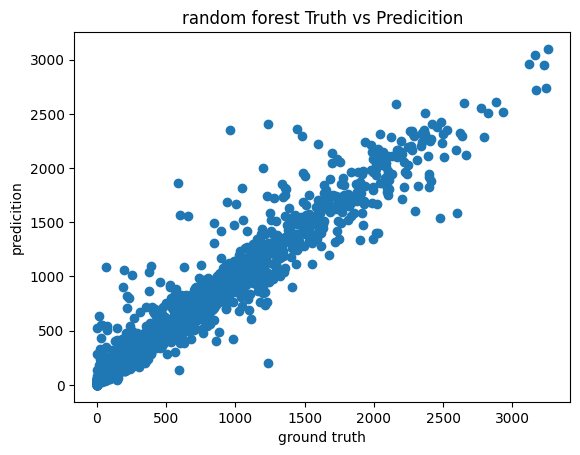

In [153]:
plt.scatter(y_test, y_pred_rf)
plt.title("random forest Truth vs Predicition")
plt.xlabel("ground truth")
plt.ylabel("predicition")
plt.show()

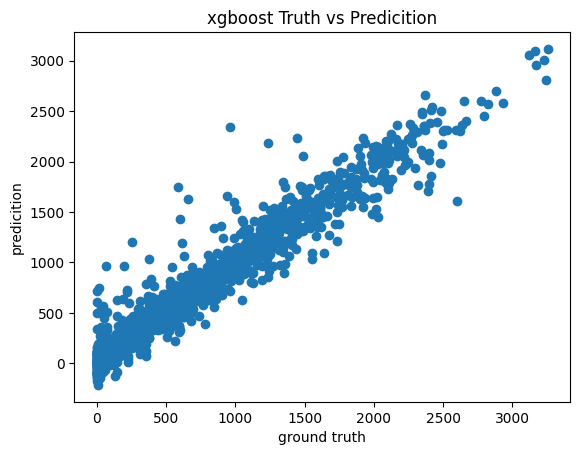

In [154]:
plt.scatter(y_test, y_pred_xgb)
plt.title("xgboost Truth vs Predicition")
plt.xlabel("ground truth")
plt.ylabel("predicition")
plt.show()